**Rutweek Sawant Assignment - 2**

![alt text](https://drive.google.com/uc?id=1whg-EG5A2nXlukZk0YmfCmmC71V76neb)

**Import Libraries**

In [0]:
#!pip install tensorflow==1.14
import numpy as np
import tensorflow as tf
import os
from tensorflow import keras
from IPython import display
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout, GaussianNoise, GaussianDropout
from keras.layers import Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D, SeparableConv2D
from keras.constraints import maxnorm
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras import regularizers, optimizers
print(tf.__version__)
from keras.preprocessing.image import ImageDataGenerator
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from keras import models
from keras import layers

Using TensorFlow backend.


1.15.0


**Mount Drive**

In [0]:
from google.colab import drive
drive.mount('/content/drive')
train_dir = '|------Train Directory--------|'
test_dir = '|-------Test Directory---------|'
valid_dir= '|-------Val Directory----------|'

**Image Preprocessing**


*   Image Size = Set it as per your Computational Capacity
*   Calling Imagegenerator transform Test|Train|Validation images




In [0]:
image_size = 64
#Training data with augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.5,
      height_shift_range=0.5,
      brightness_range=[0.2,0.8],
     # np.clip(x_channel + np.random.uniform(-value, value), min_img, max_img) for x_channel in img,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)


train_batchsize = 36
tst_batchsize = 10

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')
# Data Generator for Test data
val_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(image_size, image_size),
        batch_size=tst_batchsize,
        class_mode='categorical',
        shuffle=False)
# Data Generator for Test data
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(image_size, image_size),
        batch_size=tst_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 888 images belonging to 30 classes.
Found 473 images belonging to 30 classes.
Found 118 images belonging to 28 classes.


**CNN Model - Base Model**

![alt text](https://drive.google.com/uc?id=1bWKdBdt6BPnNn_8e_y-ZopCCt-CrJ2Nb)

Image Credits:


*   https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
*   Sumit Saha




In [0]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(image_size, image_size, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(30))
model.add(Activation('softmax'))

In [0]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
activation_227 (Activation)  (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_228 (Activation)  (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 31, 31, 32)      

In [0]:
image_size = 64
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=10,
      validation_data=val_generator,
      validation_steps=val_generator.samples/val_generator.batch_size,
      verbose=1)

Epoch 1/10
25/24 [==============================] - 52s 2s/step - loss: 3.3866 - acc: 0.0311 - val_loss: 3.3581 - val_acc: 0.0424
Epoch 2/10
25/24 [==============================] - 37s 1s/step - loss: 3.3436 - acc: 0.0595 - val_loss: 3.3510 - val_acc: 0.0742
Epoch 3/10
25/24 [==============================] - 38s 2s/step - loss: 3.3231 - acc: 0.0716 - val_loss: 3.2501 - val_acc: 0.0975
Epoch 4/10
25/24 [==============================] - 37s 1s/step - loss: 3.2673 - acc: 0.0950 - val_loss: 3.1743 - val_acc: 0.0975
Epoch 5/10
25/24 [==============================] - 38s 2s/step - loss: 3.2013 - acc: 0.0800 - val_loss: 3.1008 - val_acc: 0.0763
Epoch 6/10
25/24 [==============================] - 37s 1s/step - loss: 3.1610 - acc: 0.0994 - val_loss: 3.0979 - val_acc: 0.0826
Epoch 7/10
25/24 [==============================] - 37s 1s/step - loss: 3.1531 - acc: 0.1006 - val_loss: 3.0728 - val_acc: 0.0847
Epoch 8/10
25/24 [==============================] - 37s 1s/step - loss: 3.1066 - acc: 0.09

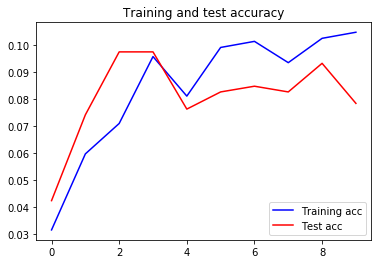

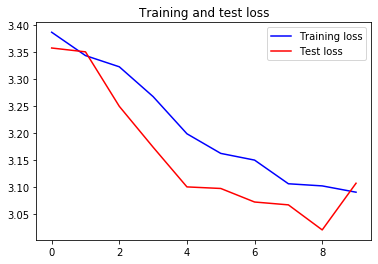

In [0]:

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Test acc')
plt.title('Training and test accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Test loss')
plt.title('Training and test loss')
plt.legend()
plt.show()

**VGG**

![alt text](https://drive.google.com/uc?id=1eSF8GF7u9UwFkphHD78T4ht9dHemL4nb)

Image Credits


*   https://towardsdatascience.com/understand-the-architecture-of-cnn-90a25e244c7
*   Author: Kousai Smeda




Image Credits


*   https://towardsdatascience.com/transfer-learning-with-convolutional-neural-networks-in-pytorch-dd09190245ce
*   Author:Will Koehrsen




In [0]:
from keras.applications import VGG16
vgg = VGG16(weights='imagenet',include_top=False,input_shape=(64,64,3))
vgg_conv=Sequential()
for layer in vgg.layers:
  vgg_conv.add(layer)

#vgg_conv = Sequential(layers=vgg_conv.layers)
#vgg_conv = Sequential()
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
#vgg_conv = tf.keras.models.Sequential()
# check the trainable status of the individual layers
for layer in vgg_conv.layers:
  #layer=tf.keras.models.Sequential()
  print(layer, layer.trainable)

vgg_conv.summary()
model= vgg_conv

<keras.layers.convolutional.Conv2D object at 0x7f061050b080> False
<keras.layers.convolutional.Conv2D object at 0x7f061050b0f0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f061052d320> False
<keras.layers.convolutional.Conv2D object at 0x7f06104cf898> False
<keras.layers.convolutional.Conv2D object at 0x7f06104cfeb8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f06104da518> False
<keras.layers.convolutional.Conv2D object at 0x7f06104dfe48> False
<keras.layers.convolutional.Conv2D object at 0x7f06104e46a0> False
<keras.layers.convolutional.Conv2D object at 0x7f06104ea400> False
<keras.layers.pooling.MaxPooling2D object at 0x7f06104f0e48> False
<keras.layers.convolutional.Conv2D object at 0x7f06104fbd68> False
<keras.layers.convolutional.Conv2D object at 0x7f06105005c0> False
<keras.layers.convolutional.Conv2D object at 0x7f06105064e0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f061048cda0> False
<keras.layers.convolutional.Conv2D object at 0x7f0610495c50> T

In [0]:
vgg_conv.add(Flatten())
vgg_conv.add(Dense(1024, activation='relu'))
vgg_conv.add(Dropout(0.5))
vgg_conv.add(Dense(1024, activation='relu'))
vgg_conv.add(Dense(1024, activation='relu'))
vgg_conv.add(Dense(30, activation= tf.nn.softmax))

In [0]:
vgg_conv.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 16, 16, 256)      

In [0]:
vgg_conv.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])


history = vgg_conv.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=50,
      validation_data=val_generator,
      validation_steps=val_generator.samples/val_generator.batch_size,
      verbose=1)

Epoch 1/50
25/24 [==============================] - 102s 4s/step - loss: 3.3474 - acc: 0.0628 - val_loss: 3.0887 - val_acc: 0.1589
Epoch 2/50
25/24 [==============================] - 96s 4s/step - loss: 3.0396 - acc: 0.1317 - val_loss: 2.5288 - val_acc: 0.3199
Epoch 3/50
25/24 [==============================] - 96s 4s/step - loss: 2.6658 - acc: 0.2250 - val_loss: 2.0146 - val_acc: 0.4195
Epoch 4/50
25/24 [==============================] - 96s 4s/step - loss: 2.2478 - acc: 0.3317 - val_loss: 1.4821 - val_acc: 0.5784
Epoch 5/50
25/24 [==============================] - 97s 4s/step - loss: 1.9785 - acc: 0.3678 - val_loss: 1.4172 - val_acc: 0.5614
Epoch 6/50
25/24 [==============================] - 96s 4s/step - loss: 1.8081 - acc: 0.4172 - val_loss: 1.2671 - val_acc: 0.6038
Epoch 7/50
25/24 [==============================] - 95s 4s/step - loss: 1.5618 - acc: 0.4745 - val_loss: 1.0281 - val_acc: 0.6419
Epoch 8/50
25/24 [==============================] - 94s 4s/step - loss: 1.4198 - acc: 0.5

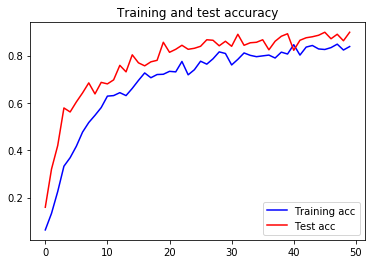

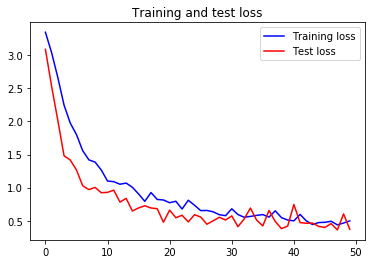

In [0]:
# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Test acc')
plt.title('Training and test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Test loss')
plt.title('Training and test loss')
plt.legend()

plt.show()

**VGG-19**

In [0]:
from keras.applications import VGG19
vgg = VGG19(weights='imagenet',include_top=False,input_shape=(64,64,3))
vgg_conv=Sequential()
for layer in vgg.layers:
  vgg_conv.add(layer)
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
for layer in vgg_conv.layers:
  print(layer, layer.trainable)
vgg_conv.summary()
model= vgg_conv

80142336/80134624 [==============================] - 6s 0us/step
<keras.layers.convolutional.Conv2D object at 0x7f06101e9c50> False
<keras.layers.convolutional.Conv2D object at 0x7f0610242f60> False
<keras.layers.pooling.MaxPooling2D object at 0x7f061013e6d8> False
<keras.layers.convolutional.Conv2D object at 0x7f06101dc3c8> False
<keras.layers.convolutional.Conv2D object at 0x7f06101d5278> False
<keras.layers.pooling.MaxPooling2D object at 0x7f0610011748> False
<keras.layers.convolutional.Conv2D object at 0x7f0610024978> False
<keras.layers.convolutional.Conv2D object at 0x7f06100291d0> False
<keras.layers.convolutional.Conv2D object at 0x7f061002d5c0> False
<keras.layers.convolutional.Conv2D object at 0x7f0610032860> False
<keras.layers.pooling.MaxPooling2D object at 0x7f061003f358> False
<keras.layers.convolutional.Conv2D object at 0x7f06100468d0> False
<keras.layers.convolutional.Conv2D object at 0x7f060ffcc9e8> False
<keras.layers.convolutional.Conv2D object at 0x7f060ffd2748> Fal

In [0]:
vgg_conv.add(Flatten())
vgg_conv.add(Dense(1024, activation='relu'))
vgg_conv.add(Dropout(0.5))
vgg_conv.add(Dense(1024, activation='relu'))
vgg_conv.add(Dense(1024, activation='relu'))
vgg_conv.add(Dense(30, activation= tf.nn.softmax))

In [0]:
# Compile the model
vgg_conv.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

# Train the Model
history = vgg_conv.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=50,
      validation_data=val_generator,
      validation_steps=val_generator.samples/val_generator.batch_size,
      verbose=1)

Epoch 1/50
25/24 [==============================] - 117s 5s/step - loss: 3.3339 - acc: 0.0623 - val_loss: 3.1423 - val_acc: 0.1229
Epoch 2/50
25/24 [==============================] - 108s 4s/step - loss: 3.0464 - acc: 0.1350 - val_loss: 2.6571 - val_acc: 0.2627
Epoch 3/50
25/24 [==============================] - 107s 4s/step - loss: 2.6569 - acc: 0.2167 - val_loss: 2.2046 - val_acc: 0.3623
Epoch 4/50
25/24 [==============================] - 108s 4s/step - loss: 2.3783 - acc: 0.2950 - val_loss: 1.7319 - val_acc: 0.4364
Epoch 5/50
25/24 [==============================] - 108s 4s/step - loss: 2.1106 - acc: 0.3177 - val_loss: 1.4685 - val_acc: 0.5191
Epoch 6/50
25/24 [==============================] - 108s 4s/step - loss: 1.8789 - acc: 0.4016 - val_loss: 1.5447 - val_acc: 0.5085
Epoch 7/50
25/24 [==============================] - 110s 4s/step - loss: 1.8180 - acc: 0.4123 - val_loss: 1.2480 - val_acc: 0.5720
Epoch 8/50
25/24 [==============================] - 109s 4s/step - loss: 1.7802 - a

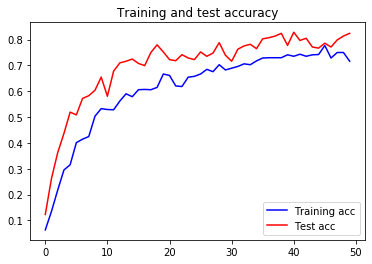

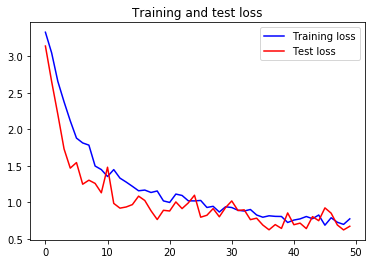

In [0]:
# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Test acc')
plt.title('Training and test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Test loss')
plt.title('Training and test loss')
plt.legend()
plt.show()

**Le-Net Model**

![alt text](https://drive.google.com/uc?id=164jWoclOrqtwIHAj1YcPeB7M8Wv_vWnj)

Image Credits


*   http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf
*   Authors: Yann Lecun, Leon Bottou, Yoshua Bengio, Patrick Haffner



In [0]:
# Import train_test_split from scikit library

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5),strides=2, activation='relu', input_shape=(64,64,3)))
cnn_model.add(AveragePooling2D())
cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())
cnn_model.add(Flatten())
cnn_model.add(Dense(units=120, activation='relu'))
cnn_model.add(Dense(units=84, activation='relu'))
cnn_model.add(Dense(units=30, activation = 'softmax'))


In [0]:
cnn_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

history = cnn_model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=50,
      validation_data=val_generator,
      validation_steps=val_generator.samples/val_generator.batch_size,
      verbose=1)

Epoch 1/50
25/24 [==============================] - 32s 1s/step - loss: 3.2966 - acc: 0.0777 - val_loss: 3.2798 - val_acc: 0.0869
Epoch 2/50
25/24 [==============================] - 24s 959ms/step - loss: 3.2779 - acc: 0.0872 - val_loss: 3.2801 - val_acc: 0.0890
Epoch 3/50
25/24 [==============================] - 25s 986ms/step - loss: 3.2636 - acc: 0.0933 - val_loss: 3.2594 - val_acc: 0.0826
Epoch 4/50
25/24 [==============================] - 24s 955ms/step - loss: 3.2443 - acc: 0.0933 - val_loss: 3.2301 - val_acc: 0.0911
Epoch 5/50
25/24 [==============================] - 24s 966ms/step - loss: 3.2385 - acc: 0.0939 - val_loss: 3.2370 - val_acc: 0.0869
Epoch 6/50
25/24 [==============================] - 24s 970ms/step - loss: 3.2143 - acc: 0.1056 - val_loss: 3.1994 - val_acc: 0.0826
Epoch 7/50
25/24 [==============================] - 24s 961ms/step - loss: 3.1992 - acc: 0.0961 - val_loss: 3.1651 - val_acc: 0.0720
Epoch 8/50
25/24 [==============================] - 24s 964ms/step - los

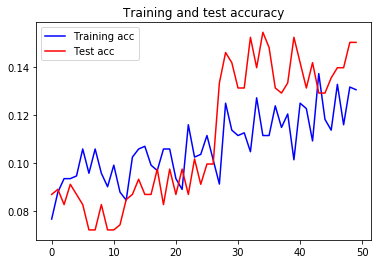

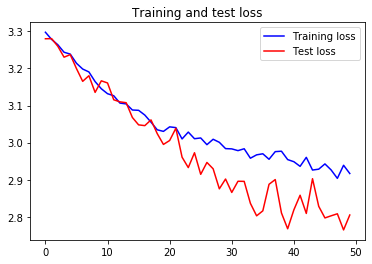

In [0]:
# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Test acc')
plt.title('Training and test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Test loss')
plt.title('Training and test loss')
plt.legend()
plt.show()

**RENSET-50**

![alt text](https://drive.google.com/uc?id=1AVrd3fGrlhqNM2w4A952Tu9IvaK2v_0S)

Image Credits


*   https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035
*   Author: Vincent Fung




In [0]:
# Import train_test_split from scikit library
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
cnn_model = Sequential()
cnn_model.add(ResNet50(weights='imagenet',include_top=False,input_shape=(64,64,3)))
for layer in cnn_model.layers[:-4]:
    layer.trainable = False
cnn_model.add(Flatten())
cnn_model.add(Dense(units=120, activation='relu'))
cnn_model.add(Dense(units=84, activation='relu'))
cnn_model.add(Dense(units=30, activation = 'softmax'))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step



In [0]:
# Compile the model
cnn_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

# Train the Model
history = cnn_model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=50,
      validation_data=val_generator,
      validation_steps=val_generator.samples/val_generator.batch_size,
      verbose=1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
25/24 [==============================] - 375s 15s/step - loss: 3.3623 - acc: 0.0878 - val_loss: 3.4326 - val_acc: 0.1776
Epoch 2/50
25/24 [==============================] - 150s 6s/step - loss: 2.6442 - acc: 0.2800 - val_loss: 2.9914 - val_acc: 0.2960
Epoch 3/50
25/24 [==============================] - 149s 6s/step - loss: 2.0569 - acc: 0.4528 - val_loss: 2.4867 - val_acc: 0.4567
Epoch 4/50
25/24 [==============================] - 152s 6s/step - loss: 1.4749 - acc: 0.5933 - val_loss: 2.0337 - val_acc: 0.5328
Epoch 5/50
25/24 [==============================] - 150s 6s/step - loss: 1.0973 - acc: 0.7006 - val_loss: 1.7933 - val_acc: 0.5603
Epoch 6/50
25/24 [==============================] - 150s 6s/step - loss: 0.8558 - acc: 0.7500 - val_loss: 1.7447 - val_acc: 0.5941
Epoch 7/50
25/24 [==============================] - 149s 6s/step - loss: 0.7495 - acc: 0.7856 - val_loss: 1.3273 - 

![alt text](https://drive.google.com/uc?id=1zt8gdCGHsAdfVNTcBLsO2aMXwnYOx3em)

**Above given snippet is of initial layers of RESNET 50, unfortunately it was not feasible to run it again as it took lot of computational power(runtime -> 3 hours apprx on CPU / 2 hour on GPU).**

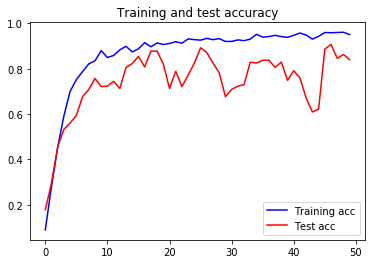

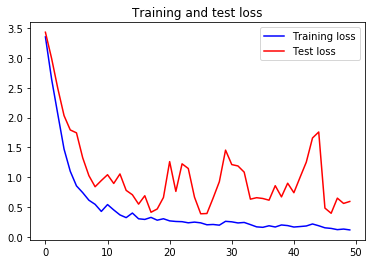

In [0]:
# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Test acc')
plt.title('Training and test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Test loss')
plt.title('Training and test loss')
plt.legend()
plt.show()